## 3.6.2 Simple Linear Regression

In [1]:
#loading statistical packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

In [2]:
#importing Boston dataset
boston = pd.read_csv('Boston.csv')
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [3]:
#fitting basic OLS
model = sm.OLS.from_formula('medv~lstat', data = boston)
#getting basic summary results
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           5.08e-88
Time:                        15:44:51   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
#quantities of interest that can be extracted
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',

In [5]:
#getting coefficients
print(results.params)

Intercept    34.553841
lstat        -0.950049
dtype: float64


In [6]:
#getting confidence intervals
print(results.conf_int())

                   0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951


In [7]:
#creating sample data to predict
#create df with predictor variable column
prediction_df = pd.DataFrame({'lstat':[5,10,15]})
prediction_df

,lstat
0,5
1,10
2,15


In [8]:
#dataframe of prediction intervals and confidence intervals
#mean_ci -> confidence interval
#obs_ci -> observation confidence interval a.k.a. prediction interval
predictions = results.get_prediction(prediction_df)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


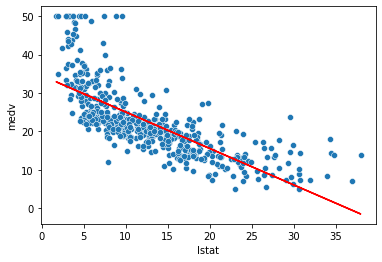

In [9]:
#plotting regression line over scatterplot of the data
sns.scatterplot(x='lstat', y='medv', data=boston)
plt.plot(boston.lstat, results.fittedvalues, 'r')

<AxesSubplot:xlabel='lstat', ylabel='medv'>

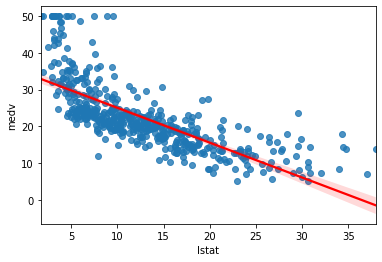

In [10]:
#note that certain seaborn plots have regression plots built in (with confidence intervals)
sns.regplot(x='lstat', y='medv', data=boston, line_kws = {'color': 'red'})

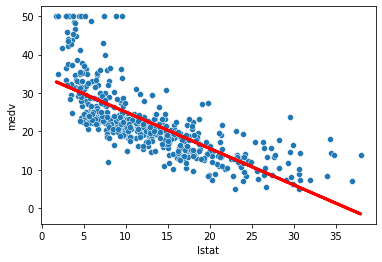

In [11]:
#changing line width
sns.scatterplot(x='lstat', y='medv', data=boston)
plt.plot(boston.lstat, results.fittedvalues, 'r', linewidth=3)

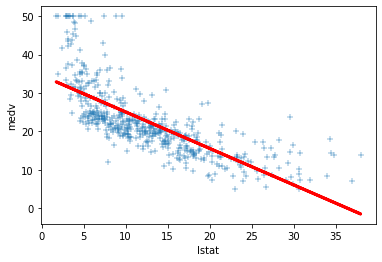

In [12]:
#changing plotting symbols
sns.scatterplot(x='lstat', y='medv', data=boston, marker='+')
plt.plot(boston.lstat, results.fittedvalues, 'r', linewidth=3)

### Regression Diagnostic Plots
R has four built-in diagnostic plots which we will try to recreate with python  
1.Residuals plotted against Fitted Values  
2.Normal QQ plot of residuals  
3.Scale-location plot (which is used to check for homoscedacity)  
4.Residuals (or studentized residuals) against 

#### Residuals plotting against fitted

<AxesSubplot:>

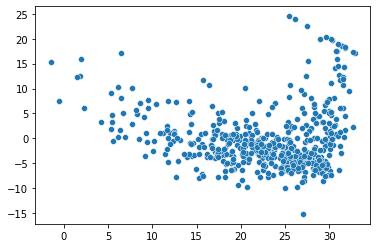

In [13]:
#getting fitted values and residuals
fitted_val = results.fittedvalues
residuals = results.resid
sns.scatterplot(x=fitted_val, y=residuals)

<AxesSubplot:xlabel='Fitted Values', ylabel='Residuals'>

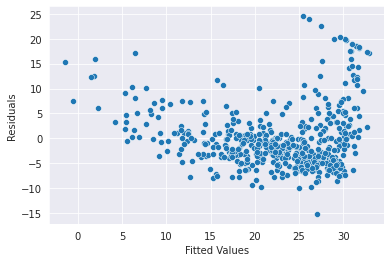

In [14]:
#cleaning up the chart
#setting theme to darkgrid
sns.set_style('darkgrid')
fitted_values = pd.Series(fitted_val, name='Fitted Values')
residuals = pd.Series(residuals, name='Residuals')
sns.scatterplot(x=fitted_values, y=residuals)

Above we can see that the relationship seems to not be entirely linear

#### plotting the QQ plot to check for normality

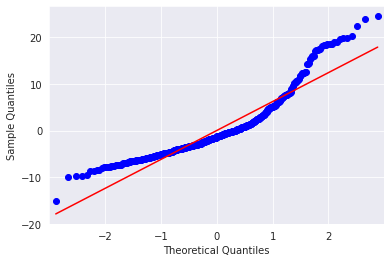

In [15]:
import statsmodels.api as sm 
import pylab as py 

sm.qqplot(results.resid, line='s') 
plt.show() 

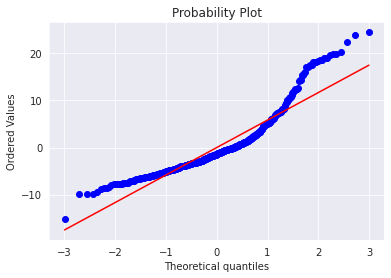

In [16]:
import scipy
scipy.stats.probplot(results.resid, dist='norm', plot =plt)
plt.show()

#### Plotting scale-location chart to check for heteroscedacity

<AxesSubplot:xlabel='Fitted Values', ylabel='S. Residuals'>

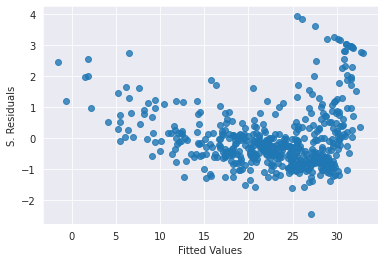

In [17]:
s_residuals = pd.Series(results.resid_pearson, name="S. Residuals")
sns.regplot(x=fitted_values, y=s_residuals,  fit_reg=False)

like R, lets try plotting scale-location with square root of standardized values against fitting values

/home/jordan/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Fitted Values', ylabel='S. Residuals'>

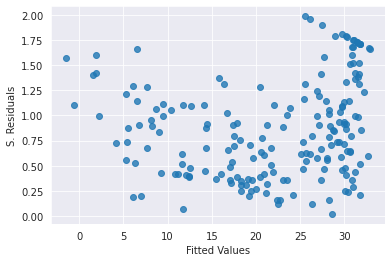

In [18]:
sqrt_standResid = np.sqrt(s_residuals)
sns.regplot(x=fitted_values, y=sqrt_standResid,  fit_reg=False)

#### plotting an influence plot to look for leverage and outliers

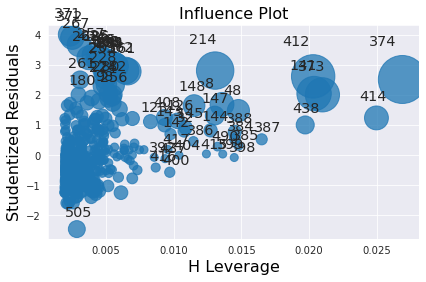

In [19]:
sm.graphics.influence_plot(results, criterion='Cooks').tight_layout(pad=1.0)


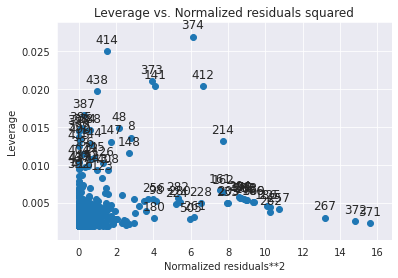

In [20]:
sm.graphics.plot_leverage_resid2(results)
plt.show()

#### Getting observation with highest leverage

In [21]:
import statsmodels.stats.outliers_influence as oi

In [22]:
infl = oi.OLSInfluence(results)
infDf=infl.summary_frame()

In [23]:
infDf

,dfb_Intercept,dfb_lstat,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.059716,0.044977,0.001886,-0.938750,0.004263,-0.061420,-0.938639,-0.061413
1,-0.028156,0.015069,0.000582,-0.687871,0.002456,-0.034128,-0.687511,-0.034110
2,0.044083,-0.034510,0.001004,0.641041,0.004864,0.044815,0.640666,0.044789
3,0.019757,-0.016039,0.000198,0.264480,0.005640,0.019918,0.264236,0.019900
4,0.066762,-0.049471,0.002384,1.081699,0.004059,0.069053,1.081882,0.069065
...,...,...,...,...,...,...,...,...
501,-0.018179,0.008887,0.000266,-0.477868,0.002322,-0.023053,-0.477502,-0.023035
502,-0.035414,0.019126,0.000912,-0.858140,0.002472,-0.042719,-0.857915,-0.042708
503,-0.051219,0.037367,0.001421,-0.853618,0.003886,-0.053317,-0.853387,-0.053303
504,-0.057161,0.039732,0.001843,-1.031025,0.003456,-0.060717,-1.031090,-0.060721


In [24]:
infDf.loc[infDf.hat_diag==infDf.hat_diag.max(), :]

,dfb_Intercept,dfb_lstat,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
374,-0.294291,0.401657,0.086162,2.498416,0.026865,0.415119,2.511537,0.4173


In [25]:
infDf.iloc[414, :]

dfb_Intercept     -0.137901
dfb_lstat          0.189670
cooks_d            0.019514
standard_resid     1.234823
hat_diag           0.024957
dffits_internal    0.197554
student_resid      1.235468
dffits             0.197657
Name: 414, dtype: float64

<AxesSubplot:xlabel='hat_diag', ylabel='student_resid'>

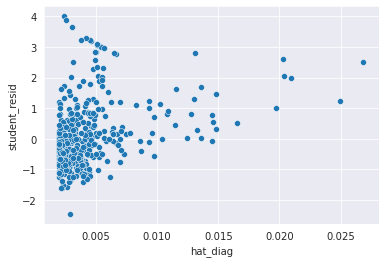

In [26]:
#student vs hat diag (influence)
sns.scatterplot(x='hat_diag', y = 'student_resid', data=infDf)

# 3.6.3 Multiple Linear Regression

In [27]:
model = sm.OLS.from_formula('medv~lstat+age', data= boston)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           2.98e-88
Time:                        15:44:57   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#rse matches if you use residual degrees of freedom
np.sqrt(results.ssr/(results.df_resid))

6.173136281359115

In [29]:
results.ess

23548.166806258952

In [30]:
#all predictor variables in dataFrame
allIVsList = [i for i in boston.columns]
allIVsList.remove('medv')
allIVs = '+'.join(allIVsList)
my_formula = 'medv~' + allIVs
my_formula

'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [31]:
#fitting all columns
all_columns = boston.columns
model = sm.OLS.from_formula(my_formula, data= boston)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 16 Oct 2020   Prob (F-statistic):          6.72e-135
Time:                        15:44:57   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#r-squared
results.rsquared

0.7406426641094094

In [33]:
#rse (unfortunately doesnt match r readout probably because ssr is 
#'whitened')
#grab rss (or ssr) and number of obs. (or nobs)
np.sqrt(results.ssr/(results.nobs-2))

4.68846621321412

In [34]:
#rse matches if you use residual degrees of freedom
np.sqrt(results.ssr/(results.df_resid))

4.745298181699631

In [35]:
#calculating vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calc_vif(ivDF):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = ivDF.columns
    vif["VIF"] = [variance_inflation_factor(ivDF.values, i) for i in range(ivDF.shape[1])]

    return(vif)

colList = [i for i in boston.columns]
colList.remove('medv')
ivDF = boston.loc[:,colList]
#adding constant for correct calc in python
ivDF =add_constant(ivDF)
calc_vif(ivDF) #ignore constant

,variables,VIF
0,const,585.265238
1,crim,1.792192
2,zn,2.298758
3,indus,3.991596
4,chas,1.073995
5,nox,4.393720
6,rm,1.933744
7,age,3.100826
8,dis,3.955945
9,rad,7.484496


In [36]:
ivDF

,const,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


# 3.6.4 Interaction Terms

In [37]:
model = sm.OLS.from_formula('medv~lstat*age', data= boston)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           4.86e-88
Time:                        15:44:58   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.6.5 Non-linear Transformations of the Predictors

In [38]:
model = sm.OLS.from_formula('medv~lstat+np.square(lstat)', data= boston)
results2 = model.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 16 Oct 2020   Prob (F-statistic):          1.56e-112
Time:                        15:44:58   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872     49.149      0.000      41.149      44.575
lstat               -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.square(lstat)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
results1 = sm.OLS.from_formula('medv ~ lstat', data=boston).fit()
sm.stats.anova_lm(results1, results2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


Text(0.5, 1.0, 'No_transform')

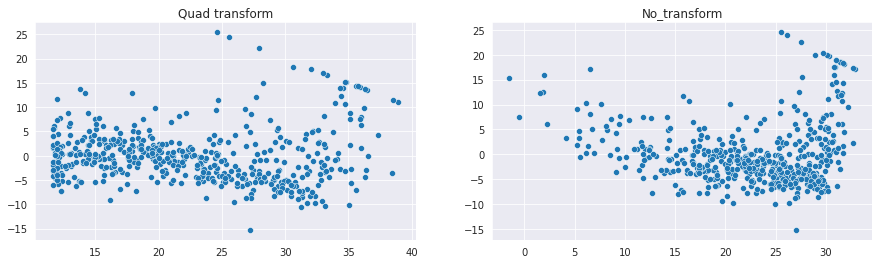

In [40]:
f, axes =plt.subplots(1,2, figsize=(15,4))
sns.scatterplot(x=results2.fittedvalues, y=results2.resid, ax=axes[0]).set_title('Quad transform')
sns.scatterplot(x=results1.fittedvalues, y=results1.resid, ax=axes[1]).set_title('No_transform')

<AxesSubplot:>

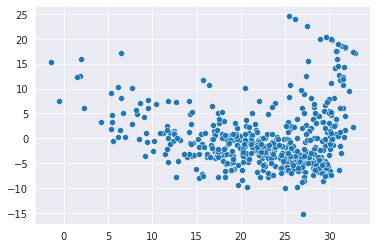

In [41]:
sns.scatterplot(x=results1.fittedvalues, y=results1.resid)

In [42]:
#creating a polynomial term in formula lstat^5 and all terms below
terms = []
for i in range(1,6):
    terms.append('np.power(lstat,{})'.format(i))
print(terms)
myformula = ' + '.join(terms)
'medv ~ '+myformula

['np.power(lstat,1)', 'np.power(lstat,2)', 'np.power(lstat,3)', 'np.power(lstat,4)', 'np.power(lstat,5)']


'medv ~ np.power(lstat,1) + np.power(lstat,2) + np.power(lstat,3) + np.power(lstat,4) + np.power(lstat,5)'

In [43]:
#using list comprehension
terms = ['np.power(lstat,{})'.format(i) for i in range(1,6)]
myformula = 'medv ~ ' + ' + '.join(terms)
myformula

'medv ~ np.power(lstat,1) + np.power(lstat,2) + np.power(lstat,3) + np.power(lstat,4) + np.power(lstat,5)'

In [44]:
model4 = sm.OLS.from_formula(myformula, data = boston)
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Fri, 16 Oct 2020   Prob (F-statistic):          8.73e-122
Time:                        15:44:59   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             67.6997      3.604     18.783      0.000      60.618      74.781
np.power(lstat, 1)   -11.9911      1.526     -7.859      0.000     -14.989      -8.994
np.power(lstat, 2)     1.2728      0.223      5.703      0.000       0.834       1.711
np.power(lstat, 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
np.power(lstat, 4)     0.0017      0.000      4.143      0.000       0.001       0.003
np.power(lstat, 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Polynomial')

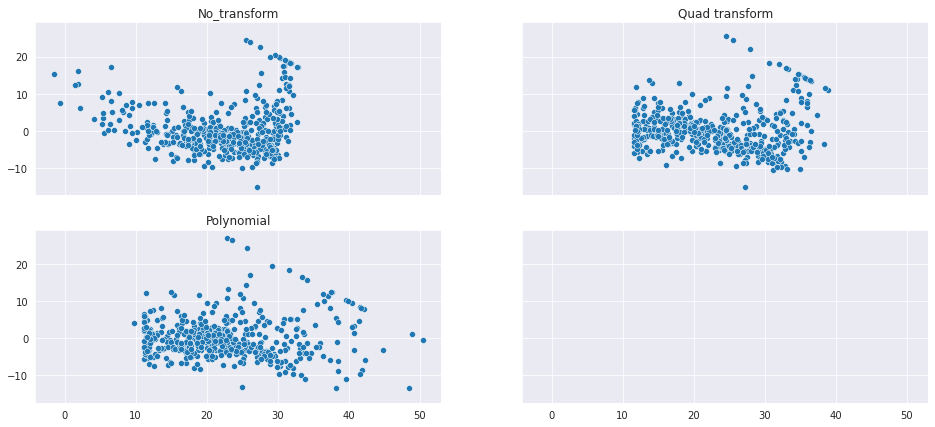

In [67]:
f, axes = plt.subplots(nrows=2,ncols=2, figsize = (16,7), sharex=True, sharey=True)
sns.scatterplot(x=results2.fittedvalues, y=results2.resid, ax=axes[0,1]).set_title('Quad transform')
sns.scatterplot(x=results1.fittedvalues, y=results1.resid, ax=axes[0,0]).set_title('No_transform')
sns.scatterplot(x=results4.fittedvalues, y=results4.resid, ax=axes[1,0]).set_title('Polynomial')

Text(0.5, 1.0, 'Polynomial')

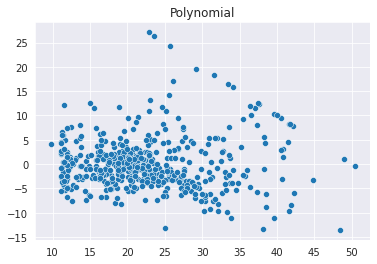

In [49]:
sns.scatterplot(x=results4.fittedvalues, y=results4.resid).set_title('Polynomial')

In [68]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           5.08e-88
Time:                        15:55:10   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#trying a log transform
model5 = sm.OLS.from_formula('medv~np.log(rm)',data=boston)
results5 = model5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           1.22e-64
Time:                        15:56:39   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(rm)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
#removing log transfrom
model6 = sm.OLS.from_formula('medv~rm',data=boston)
results6 = model6.fit()
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           2.49e-74
Time:                        15:57:14   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
rm             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

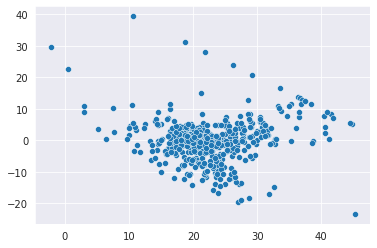

In [74]:
sns.scatterplot(x=results6.fittedvalues, y=results6.resid)

<AxesSubplot:>

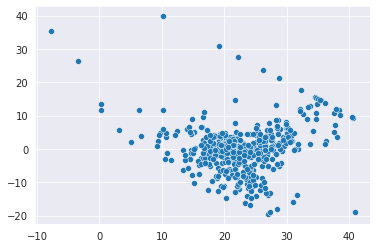

In [75]:
sns.scatterplot(x=results5.fittedvalues, y=results5.resid)

In [76]:

model7 = sm.OLS.from_formula('medv~rm+np.log(rm)',data=boston)
results7 = model7.fit()
results7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     313.8
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           3.49e-89
Time:                        15:59:26   Log-Likelihood:                -1635.3
No. Observations:                 506   AIC:                             3277.
Df Residuals:                     503   BIC:                             3289.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    124.8735     17.909      6.973      0.000      89.688     160.059
rm            39.4922      3.401     11.611      0.000      32.810      46.175
np.log(rm)  -191.3540     21.276     -8.994      0.000    -233.154    -149.554
==============================================================================
Omnibus:                       82.978   Durbin-Watson:                   0.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              920.923
Skew:                           0.255   Prob(JB):                    1.06e-200
Kurtosis:                       9.589   Cond. No.                         681.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

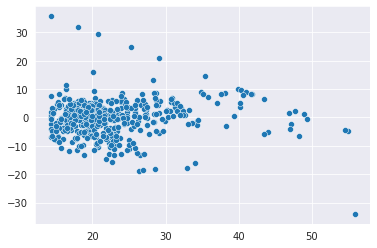

In [77]:
sns.scatterplot(x=results7.fittedvalues, y=results7.resid)

In [80]:

model8 = sm.OLS.from_formula('medv~rm+np.square(rm)+ np.power(rm, 3)',data=boston)
results8 = model8.fit()
results8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     214.0
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           2.14e-89
Time:                        16:01:40   Log-Likelihood:                -1631.8
No. Observations:                 506   AIC:                             3272.
Df Residuals:                     502   BIC:                             3289.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         241.3108     47.327      5.099      0.000     148.327     334.295
rm               -109.3906     22.969     -4.763      0.000    -154.518     -64.263
np.square(rm)      16.4910      3.675      4.487      0.000       9.271      23.711
np.power(rm, 3)    -0.7404      0.193     -3.827      0.000      -1.121      -0.360
==============================================================================
Omnibus:                       83.263   Durbin-Watson:                   0.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              809.956
Skew:                           0.336   Prob(JB):                    1.32e-176
Kurtosis:                       9.162   Cond. No.                     5.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

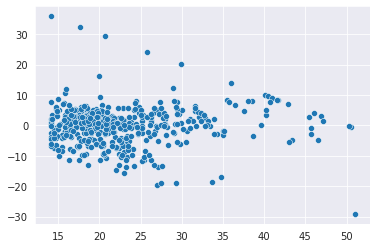

In [81]:
sns.scatterplot(x=results8.fittedvalues, y=results8.resid)

# 3.6.6 Qualitative Predictors

In [83]:
carseat = pd.read_csv('Carseats.csv')

In [89]:
print(carseat.columns)

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')


In [90]:
carseat.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [102]:
allCol = [i for i in carseat.columns]
allCol.remove('Sales')
myformula = 'Sales ~ '+ ' + '.join(allCol)
myformula += ' + Income:Advertising' + ' + Price:Age'
myformula

'Sales ~ CompPrice + Income + Advertising + Population + Price + ShelveLoc + Age + Education + Urban + US + Income:Advertising + Price:Age'

In [104]:
model = sm.OLS.from_formula(myformula, data = carseat)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Fri, 16 Oct 2020   Prob (F-statistic):          6.14e-166
Time:                        16:43:01   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""